In [55]:
!pip install opencv-python-headless

In [56]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

import joblib
import cv2
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

In [57]:
# Load the MNIST dataset
digits = datasets.load_digits()
print("number of samples: ",len(digits.images))

number of samples:  1797


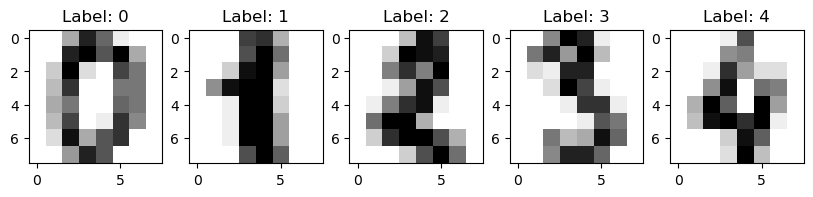

First 5 target labels: [0 1 2 3 4]
First 5 flattened image data:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.

In [58]:
# The images (8x8 pixel images)
images = digits.images

# The target labels (digits 0-9)
targets = digits.target

# The data (flattened images, each 8x8 image becomes a 1D array of 64 elements)
data = digits.data

# Display the first 5 images and their corresponding labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Label: {targets[i]}')
plt.show()

# Print the first 5 targets
print("First 5 target labels:", targets[:5])

# Print the first 5 flattened images
print("First 5 flattened image data:\n", data[:5])

In [59]:
# Preprocess the data
# Flatten the images
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [60]:
# Normalize the pixel values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Train the model using SVM
svm = SVC(C=100 , gamma=0.001)
svm.fit(X_train, y_train)

# Save the trained model
joblib.dump(svm, 'svm_digit_classifier.pkl')

# Make predictions
y_pred = svm.predict(X_test)

In [93]:
# Evaluate the model
print("Classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.9777777777777777


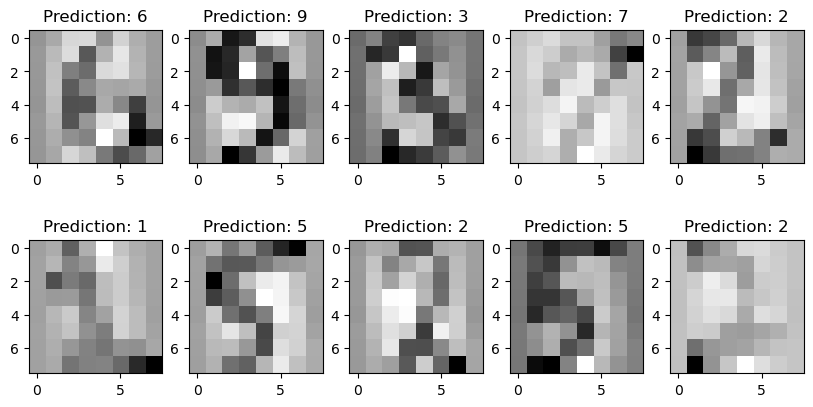

In [94]:
# Visualize some of the test results
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {y_pred[i]}')
plt.show()

In [95]:
# Load the trained model
svm = joblib.load('svm_digit_classifier.pkl')

In [96]:
def preprocess_image(image_path):
    # Read the image
    image = io.imread(image_path)
    
    # Convert RGBA to RGB if necessary
    if image.shape[2] == 4:
        image = image[:, :, :3]
    
    # Convert to grayscale
    image = rgb2gray(image)    
    
    # Resize to 8x8 pixels (same as the training data)
    image_resized = resize(image, (8, 8), anti_aliasing=True)
    
    # Flatten the image to a 1D array
    image_flattened = image_resized.flatten()
    
    # Normalize the pixel values (same as the training data)
    image_normalized = (image_flattened - np.mean(image_flattened)) / np.std(image_flattened)
    
    return image_normalized

In [97]:
def predict_digit(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Reshape to match the input format expected by the model
    preprocessed_image = preprocessed_image.reshape(1, -1)
    
    # Predict the digit
    prediction = svm.predict(preprocessed_image)
    
    return prediction[0]

Predicted Digit: 0


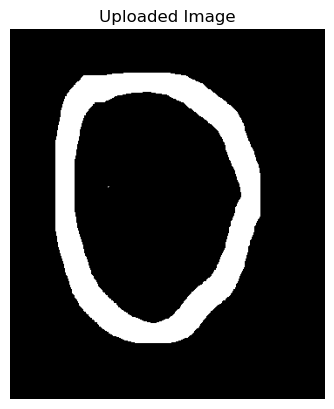

In [98]:
image_path = '0.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

# Load and display the image
image = io.imread(image_path)
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.title('Uploaded Image')
plt.axis('off')  # Hide axis labels
plt.show()

Predicted Digit: 8


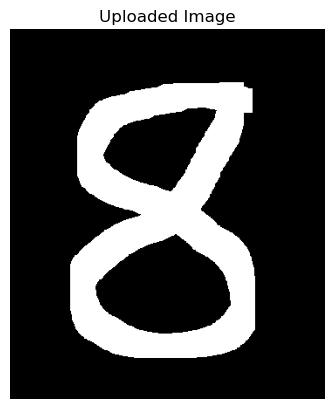

In [99]:
image_path = '8.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

# Load and display the image
image = io.imread(image_path)
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.title('Uploaded Image')
plt.axis('off')  # Hide axis labels
plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],  # Use 'rbf' kernel for SVM
}

In [102]:
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [103]:
print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy found: ", grid_search.best_score_)

Best Parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy found:  0.9812161246612467
